In [1]:
from Helper_Functions import Grover_oracle, Grover_operator, Get_Data_from_Fake_backend
import numpy as np
import math

from qiskit import QuantumCircuit
from qiskit_ibm_runtime.fake_provider import FakeAlgiers
from qiskit.visualization import plot_distribution

### **Exercise 1: Searching a Larger Space**

**Objective:** Understand how Grover's Algorithm scales with the number of qubits and verify that the helper functions automatically adjust the circuit size.

**Task:**

1. Change the `marked_states` variable to search for a single 4-qubit state: **`"1101"`**.
2. Run the `Grover_oracle`, `Grover_operator`, and the final simulation.
3. **Question:** Look at the `Optimal number of iterations` output. How does this compare to the 3-qubit example? Does it require more or fewer iterations? Repeat for 5-qubit case and observe the behaviour.


Optimal iterations for 5 qubits: 2


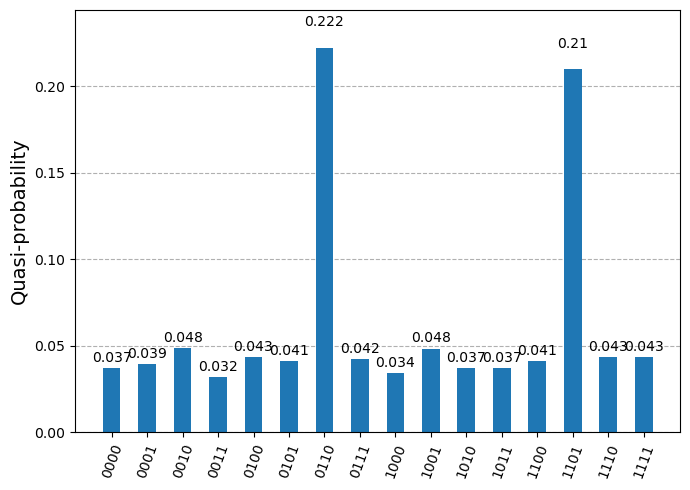

In [4]:
# [Enter your code here]
marked_states_ex1 = ["1101", "0110"]  # Example marked states for 4 qubits

# 2. Build the oracle and operator
oracle_ex1 = Grover_oracle(marked_states_ex1)
grover_op_ex1 = Grover_operator(oracle_ex1, insert_barriers=True)

# 3. Calculate optimal iterations
optimal_iter_ex1 = math.floor(
    np.pi /
    (4 * np.asin(math.sqrt(len(marked_states_ex1) / 2**grover_op_ex1.num_qubits)))
)
print(f"Optimal iterations for 5 qubits: {optimal_iter_ex1}")

# 4. Build and Run the circuit (Copying the logic from the main lab)
qc_ex1 = QuantumCircuit(grover_op_ex1.num_qubits)
qc_ex1.h(range(grover_op_ex1.num_qubits))
qc_ex1.compose(grover_op_ex1.power(optimal_iter_ex1), inplace=True)
qc_ex1.measure_all()

# Run on backend
data_ex1 = Get_Data_from_Fake_backend(10000, qc_ex1, FakeAlgiers())
plot_distribution(data_ex1.meas.get_counts())